In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special

In [2]:
state_coord = np.array([[14226,  3435],
 [14134,  3474],
 [13964,  3546],
 [13728,  3646],
 [13436,  3770],
 [13096,  3914],
 [12716,  4075], 
 [12302,  4251],
 [11859,  4439],
 [11391,  4638],
 [10902,  4846],
 [10395,  5062],
 [ 9873,  5284],
 [ 9338,  5511],
 [ 8792,  5743],
 [ 8236,  5979],
 [ 7672,  6218],
 [ 7101,  6461],
 [ 6524,  6707],
 [ 5942,  6955],
 [ 5356,  7205],
 [ 4767,  7457],
 [ 4176,  7712],
 [ 3575,  7938],
 [ 2966,  8109],
 [ 2362,  8204],
 [ 1782,  8210],
 [ 1249,  8123],
 [  787,  7950],
 [  415,  7705],
 [  149,  7410],
 [   -3,  7093],
 [  -40,  6783],
 [   22,  6483],
 [  168,  6194],
 [  385,  5916],
 [  664,  5648],
 [  995,  5390],
 [ 1372,  5143],
 [ 1788,  4905],
 [ 2237,  4676],
 [ 2714,  4456],
 [ 3216,  4244],
 [ 3739,  4039],
 [ 4280,  3842],
 [ 4836,  3652],
 [ 5405,  3469],
 [ 5987,  3292],
 [ 6579,  3121],
 [ 7180,  2956],
 [ 7788,  2797],
 [ 8402,  2644],
 [ 9023,  2497],
 [ 9649,  2356],
 [10279,  2223],
 [10913,  2098],
 [11552,  1985],
 [12191,  1913],
 [12819,  1905],
 [13417,  1974],
 [13963,  2125],
 [14434,  2352],
 [14810,  2641],
 [15076,  2971],
 [15226,  3316],
 [15260,  3646],
 [15193,  3954]])

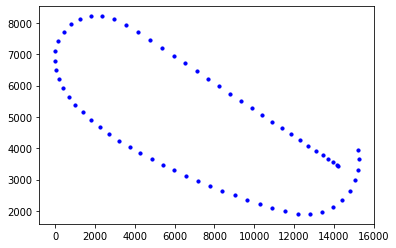

In [3]:
fig = plt.figure()
plt.scatter(state_coord[:, 0], state_coord[:, 1], s=10, c='blue')
plt.show(plt)

In [5]:
state_coord[0:2]

array([[14226,  3435],
       [14134,  3474]])

In [15]:
def speed(state_coord):
    state = {}
    state['dot_x'] = state_coord[1,0] - state_coord[0,0]
    state['dot_y'] = state_coord[1,1] - state_coord[0,1]
    state['dot'] = np.power(state['dot_x'],2) + np.power(state['dot_y'],2)
    state['dot'] = np.sqrt(state['dot'])
    return state

In [11]:
state = speed(state_coord[0:2])

In [14]:
state['dot'] = np.power(state['dot_x'],2) + np.power(state['dot_y'],2)
#np.square(state['dot'])
np.sqrt(state['dot'])

99.92497185388645

In [17]:
(size, dim) = state_coord.shape
for i in range(0, size-1):
    state = speed(state_coord[i:i+2])
    print('i {} state {}'.format(i,state))

i 0 state {'dot_x': -92, 'dot_y': 39, 'dot': 99.92497185388645}
i 1 state {'dot_x': -170, 'dot_y': 72, 'dot': 184.61852561430555}
i 2 state {'dot_x': -236, 'dot_y': 100, 'dot': 256.3123094976127}
i 3 state {'dot_x': -292, 'dot_y': 124, 'dot': 317.23808094237364}
i 4 state {'dot_x': -340, 'dot_y': 144, 'dot': 369.2370512286111}
i 5 state {'dot_x': -380, 'dot_y': 161, 'dot': 412.69964865504795}
i 6 state {'dot_x': -414, 'dot_y': 176, 'dot': 449.8577552960491}
i 7 state {'dot_x': -443, 'dot_y': 188, 'dot': 481.2411038138783}
i 8 state {'dot_x': -468, 'dot_y': 199, 'dot': 508.55186559484764}
i 9 state {'dot_x': -489, 'dot_y': 208, 'dot': 531.3990967248627}
i 10 state {'dot_x': -507, 'dot_y': 216, 'dot': 551.094365785026}
i 11 state {'dot_x': -522, 'dot_y': 222, 'dot': 567.2459783903277}
i 12 state {'dot_x': -535, 'dot_y': 227, 'dot': 581.1660692091375}
i 13 state {'dot_x': -546, 'dot_y': 232, 'dot': 593.2453118230266}
i 14 state {'dot_x': -556, 'dot_y': 236, 'dot': 604.0132448878915}
i 15 

In [18]:
state_coord = np.array([[10279,  2223],
 [10913,  2098]])

In [22]:
state = speed(state_coord[0:2])
print(state_coord)
print('i {} state {}'.format(i,state))

[[10279  2223]
 [10913  2098]]
i 65 state {'dot_x': 634, 'dot_y': -125, 'dot': 646.2050758079822}


In [24]:
target = np.array([[ 3575,  7938]])
target

array([[3575, 7938]])

In [25]:
position = np.array([[14134,  3474]])
position

array([[14134,  3474]])

In [35]:
def desired_velocity(target, position, dot):
    desired_x = target[0,0] - position[0,0]
    desired_y = target[0,1] - position[0,1]
    divider = np.power(desired_x,2) + np.power(desired_y,2)
    divider = np.sqrt(divider)
    normalize = np.divide(dot, divider)
    desired_x = desired_x * normalize
    desired_y = desired_y * normalize
    return np.array([[desired_x,desired_y]])


In [37]:
desired = desired_velocity(target, position, state['dot'])
desired

-595.1998209709226
251.63102574241861


array([[-595.19982097,  251.63102574]])

In [39]:
steering =np.array([[desired[0,0]-state['dot_x'],desired[0,1]-state['dot_y']]])
steering

array([[-1229.19982097,   376.63102574]])

In [40]:
ADDition


NameError: name 'ADDition' is not defined